In [1]:
import seaborn
import pandas as pd
import numpy as np
import requests as req
import json
import matplotlib.pyplot as plt
import csv
import os
import time
import datetime
import scipy as stats
import arrow
from citipy import citipy

In [2]:
# Lists for holding Us Geological Survey (USGS) json data
mag_data = []
place_data = []
time_data = []
updated_data = []
tz_data = []
url_data = []
detail_data = []
felt_data = []
cdi_data = []
mmi_data = []
alert_data = []
status_data = []
tsunami_data = []
sig_data = []
net_data = []
code_data = []
ids_data = []
sources_data = []
types_data = []
nst_data = []
dmin_data = []
rms_data = []
gap_data = []
magType_data = []
type_data = []
title_data = []
geo_type_data = []
lat_data = []
lng_data = []
coordinates_3_data = []

#calculated lists
converted_date = []
cd_by_month = []
cd_by_year = []

In [3]:
#https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime=2017-07-14%2000:00:00&endtime=2017-09-21%2023:59:59&maxlatitude=50&minlatitude=24.6&maxlongitude=-65&minlongitude=-125&minmagnitude=2.5&orderby=time

start = 1950
start_loop = start

#range should be 14 to retrieve 1950 to present data

for x in range(14):

    url_bit_1 = "https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime="
    year_from_1 = str(start_loop)
    year_from_2= "-01-01"
    year_to = str(int(year_from_1) + 5)
    url_bit_2= "-01-01%0000:00:00&maxlatitude=50&minlatitude=24.6&maxlongitude=-65&minlongitude=-125&minmagnitude=2.5&orderby=time"

    # Build partial query URL
    Search = url_bit_1 + year_from_1 + year_from_2  + "%0000:00:01&endtime=" + year_to + url_bit_2
    #Search

    year_range = str(start) + " through " + str(year_to)
    #year_range

    # set response variable
    response = req.get(Search).json()

    # idetify how many seismic events are in our json
    usgs_json_data = json.dumps(response)

    item_dict = json.loads(usgs_json_data)

    json_loops = len(item_dict['features'])

    #append usgs_json_data into list form

    json_counter = 0

    for x in range(json_loops):

        mag_data.append(response["features"][json_counter]["properties"]["mag"])
        place_data.append(response["features"][json_counter]["properties"]["place"])
        time_data.append(response["features"][json_counter]["properties"]["time"])
        updated_data.append(response["features"][json_counter]["properties"]["updated"])
        tz_data.append(response["features"][json_counter]["properties"]["tz"])
        url_data.append(response["features"][json_counter]["properties"]["url"])
        detail_data.append(response["features"][json_counter]["properties"]["detail"])
        felt_data.append(response["features"][json_counter]["properties"]["felt"])
        cdi_data.append(response["features"][json_counter]["properties"]["cdi"])
        mmi_data.append(response["features"][json_counter]["properties"]["mmi"])
        alert_data.append(response["features"][json_counter]["properties"]["alert"])
        status_data.append(response["features"][json_counter]["properties"]["status"])
        tsunami_data.append(response["features"][json_counter]["properties"]["tsunami"])
        sig_data.append(response["features"][json_counter]["properties"]["sig"])
        net_data.append(response["features"][json_counter]["properties"]["net"])
        code_data.append(response["features"][json_counter]["properties"]["code"])
        ids_data.append(response["features"][json_counter]["properties"]["ids"])
        sources_data.append(response["features"][json_counter]["properties"]["sources"])
        types_data.append(response["features"][json_counter]["properties"]["types"])
        nst_data.append(response["features"][json_counter]["properties"]["nst"])
        dmin_data.append(response["features"][json_counter]["properties"]["dmin"])
        rms_data.append(response["features"][json_counter]["properties"]["rms"])
        gap_data.append(response["features"][json_counter]["properties"]["gap"])
        magType_data.append(response["features"][json_counter]["properties"]["magType"])
        type_data.append(response["features"][json_counter]["properties"]["type"])
        title_data.append(response["features"][json_counter]["properties"]["title"])
        geo_type_data.append(response["features"][json_counter]["geometry"]["type"])
        lat_data.append(response["features"][json_counter]["geometry"]["coordinates"][0])
        lng_data.append(response["features"][json_counter]["geometry"]["coordinates"][1])
        coordinates_3_data.append(response["features"][json_counter]["geometry"]["coordinates"][2])
        
        
        # calculated fields
        
        converted_date.append((datetime.datetime(1970, 1, 1) + datetime.timedelta(milliseconds=time_data[len(converted_date)-1])).strftime('%m-%d-%Y'))
        cd_by_month.append((datetime.datetime(1970, 1, 1) + datetime.timedelta(milliseconds=time_data[len(cd_by_month)-1])).strftime('%m-%Y'))
        cd_by_year.append((datetime.datetime(1970, 1, 1) + datetime.timedelta(milliseconds=time_data[len(cd_by_year)-1])).strftime('%Y'))

        
        
               
        json_counter = json_counter + 1    
        
    start_loop = year_to     

In [4]:
seismic_data = {"mag" : mag_data,
                "place" : place_data,
                "time" : time_data,
                "updated" : updated_data,
                "tz" : tz_data,
                "url" : url_data,
                "detail" : detail_data,
                "felt" : felt_data,
                "cdi" : cdi_data,
                "mmi" : mmi_data,
                "alert" : alert_data,
                "status" : status_data,
                "tsunami" : tsunami_data,
                "sig" : sig_data,
                "net" : net_data,
                "code" : code_data,
                "ids" : ids_data,
                "sources" : sources_data,
                "types" : types_data,
                "nst" : nst_data,
                "dmin" : dmin_data,
                "rms" : rms_data,
                "gap" : gap_data,
                "magType" : magType_data,
                "type" : type_data,
                "title" : title_data,
                "geo_type" : geo_type_data,
                "lat" : lat_data,
                "lng" : lng_data,
                "coordinates_3" : coordinates_3_data,
                
                "converted_date" : converted_date,
                "cd_by_month" : cd_by_month,
                "cd_by_year" : cd_by_year,
                
               }

seismic_data = pd.DataFrame(seismic_data)




In [5]:
# final range returned
year_range

'1950 through 2020'

In [6]:
seismic_data.to_csv("seismic_data.csv")

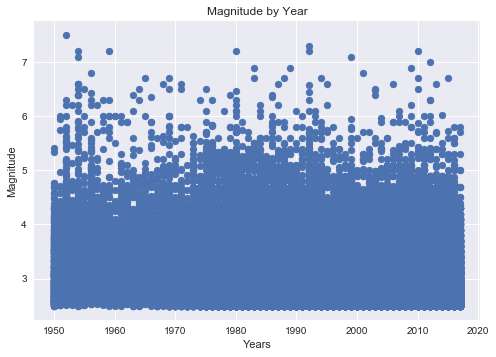

In [7]:
# Build a scatter plot for each data type
plt.scatter(seismic_data["cd_by_year"], seismic_data["mag"], marker="o")

# Incorporate the other graph properties
plt.title("Magnitude by Year") # + " " + date_stamp)
plt.ylabel("Magnitude")
plt.xlabel("Years")
plt.grid(True)

# Save the figure
#plt.savefig("Magnitude by Month.png")

# Show plot
plt.show()

In [85]:
seismic_avg_year = seismic_data.groupby(["cd_by_year"]).mean()["mag"]
seismic_count_year = seismic_data.groupby(["cd_by_year"]).count()["mag"]

seismic_data2_df = pd.DataFrame({"seismic_avg_year" : seismic_avg_year,
                                "seismic_count_year" : seismic_count_year,
                                })

seismic_data2_df = seismic_data2_df.reset_index()

seismic_data2_df.head()


,cd_by_year,seismic_avg_year,seismic_count_year
0,1950,3.166630,365
1,1951,3.205165,242
2,1952,3.750556,540
3,1953,3.169190,543
4,1954,3.419656,581


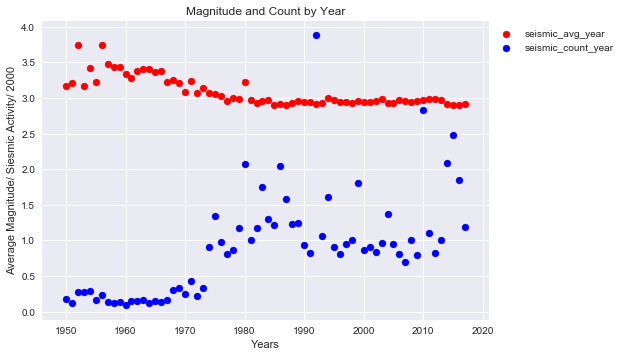

In [106]:
# Build a scatter plot for each data type
plt.scatter(seismic_data2_df["cd_by_year"], seismic_data2_df["seismic_avg_year"], marker="o", c=["red"])
plt.scatter(seismic_data2_df["cd_by_year"], seismic_data2_df["seismic_count_year"]/2000, marker="o", c=["blue"])

# Incorporate the other graph properties
plt.title("Magnitude and Count by Year") # + " " + date_stamp)
plt.ylabel("Average Magnitude/ Siesmic Activity/ 2000")
plt.xlabel("Years")
plt.grid(True)

# Save the figure
#plt.savefig("Magnitude and Count by Year.png")

plt.legend(bbox_to_anchor=(1.3, 1))

# Show plot
plt.show()